In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load datasets
climate_data_path = "../Data/Climate Change - datasets/climate_change_dataset.csv"
temperature_data_path = "../Data/Climate Change - datasets/Average Surface Temperature.csv"
sea_level_data_path = "../Data/Climate Change - datasets/Global_sea_level_rise.csv"
climate_risk_data_path = "../Data/Climate Change - datasets/Climate Risk Index.csv"
co2_emissions_data_path = "../Data/Climate Change - datasets/co2-emissions-by-sector.csv"
ghg_emissions_data_path = "../Data/Climate Change - datasets/green house gas-emissions-by-sector.csv"
per_capita_co2_data_path = "../Data/Climate Change - datasets/per-capita-co2-vs-average.csv"
global_temp_df_path = "../Data/Climate Change - datasets/all countries global temperature.csv"

In [11]:
# Read datasets
climate_df = pd.read_csv(climate_data_path)
temperature_df = pd.read_csv(temperature_data_path)
sea_level_df = pd.read_csv(sea_level_data_path)
climate_risk_df = pd.read_csv(climate_risk_data_path)
co2_emissions_df = pd.read_csv(co2_emissions_data_path)
ghg_emissions_df = pd.read_csv(ghg_emissions_data_path)
per_capita_co2_df = pd.read_csv(per_capita_co2_data_path)
global_temp_df = pd.read_csv(global_temp_df_path)

In [ ]:
# Standardize column names for merging
climate_df.rename(columns={"Country": "Entity"}, inplace=True)
temperature_df.rename(columns={"year": "Year", "Entity": "Entity"}, inplace=True)
sea_level_df.rename(columns={"year": "Year"}, inplace=True)
climate_risk_df.rename(columns={"country": "Entity"}, inplace=True)
co2_emissions_df.rename(columns={"Year": "Year", "Entity": "Entity"}, inplace=True)
ghg_emissions_df.rename(columns={"Year": "Year", "Entity": "Entity"}, inplace=True)
per_capita_co2_df.rename(columns={"Year": "Year", "Entity": "Entity"}, inplace=True)
global_temp_df.rename(columns={"Country Name": "Entity"}, inplace=True)

# Reshape the global temperature dataset from wide to long format
global_temp_df = global_temp_df.melt(id_vars=["Entity"], var_name="Year", value_name="Temperature_Change")
global_temp_df["Year"] = pd.to_numeric(global_temp_df["Year"], errors="coerce")  # Ensure Year is numeric

# Merge datasets
merged_df = climate_df.merge(temperature_df[["Entity", "Year", "Average surface temperature"]], on=["Entity", "Year"], how="left")
merged_df = merged_df.merge(sea_level_df[["Year", "mmfrom1993-2008average"]], on="Year", how="left")
merged_df = merged_df.merge(climate_risk_df[["Entity", "cri_rank", "fatalities_per_100k_total", "losses_per_gdp__total"]], on=["Entity"], how="left")
merged_df = merged_df.merge(co2_emissions_df.drop(columns=["Code"]), on=["Entity", "Year"], how="left")
merged_df = merged_df.merge(ghg_emissions_df.drop(columns=["Code"]), on=["Entity", "Year"], how="left")
merged_df = merged_df.merge(per_capita_co2_df.drop(columns=["Code"]), on=["Entity", "Year"], how="left")
merged_df = merged_df.merge(global_temp_df, on=["Entity", "Year"], how="left")  # Add new temperature dataset

# Rename sea level column for clarity
merged_df.rename(columns={"mmfrom1993-2008average": "Sea Level Anomaly (mm)"}, inplace=True)

# Get the list of countries in the original datasets before merging
original_countries = set(climate_df["Entity"].unique())

# Get the list of countries in the final merged dataset
merged_countries = set(merged_df["Entity"].unique())

# Identify missing countries
missing_countries = original_countries - merged_countries

# Display missing countries
missing_countries


set()

In [13]:
# Save the consolidated dataset
merged_df.to_csv("../Data/Climate Change - datasets/Climate_Prediction_Dataset.csv", index=False)

# Display dataset overview
print("Dataset Shape:", merged_df.shape)
print("Missing Values:", merged_df.isnull().sum().sum())
print("Column Names:", merged_df.columns.tolist())

Dataset Shape: (10482, 37)
Missing Values: 23925
Column Names: ['Year', 'Entity', 'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)', 'Population', 'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)', 'Average surface temperature', 'Sea Level Anomaly (mm)', 'cri_rank', 'fatalities_per_100k_total', 'losses_per_gdp__total', 'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry', 'Carbon dioxide emissions from land use change and forestry', 'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport', 'Carbon dioxide emissions from manufacturing and construction', 'Fugitive emissions of carbon dioxide from energy production', 'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels', 'Greenhouse gas emissions from agriculture', 'Greenhouse gas emissions from land use change and forestry', 'Greenhouse gas emissions from waste',

In [19]:
# Merge datasets
merged_df = climate_df.merge(temperature_df[["Entity", "Year", "Average surface temperature"]], on=["Entity", "Year"], how="left")
merged_df = merged_df.merge(sea_level_df[["Year", "mmfrom1993-2008average"]], on="Year", how="left")
merged_df = merged_df.merge(climate_risk_df[["Entity", "cri_rank", "fatalities_per_100k_total", "losses_per_gdp__total"]], on=["Entity"], how="left")
merged_df = merged_df.merge(co2_emissions_df.drop(columns=["Code"]), on=["Entity", "Year"], how="left")
merged_df = merged_df.merge(ghg_emissions_df.drop(columns=["Code"]), on=["Entity", "Year"], how="left")
merged_df = merged_df.merge(per_capita_co2_df.drop(columns=["Code"]), on=["Entity", "Year"], how="left")

# Rename sea level column for clarity
merged_df.rename(columns={"mmfrom1993-2008average": "Sea Level Anomaly (mm)"}, inplace=True)

# Save the consolidated dataset
merged_df.to_csv("../Data/Climate Change - datasets/Consolidated_Climate_Prediction_Dataset.csv", index=False)

# Display dataset overview
print("Dataset Shape:", merged_df.shape)
print("Missing Values:", merged_df.isnull().sum().sum())
print("Column Names:", merged_df.columns.tolist())

Dataset Shape: (10482, 36)
Missing Values: 21399
Column Names: ['Year', 'Entity', 'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)', 'Population', 'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)', 'Average surface temperature', 'Sea Level Anomaly (mm)', 'cri_rank', 'fatalities_per_100k_total', 'losses_per_gdp__total', 'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry', 'Carbon dioxide emissions from land use change and forestry', 'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport', 'Carbon dioxide emissions from manufacturing and construction', 'Fugitive emissions of carbon dioxide from energy production', 'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels', 'Greenhouse gas emissions from agriculture', 'Greenhouse gas emissions from land use change and forestry', 'Greenhouse gas emissions from waste',

In [8]:
# Overview of the dataset
merged_df.tail().T

,10477,10478,10479,10480,10481
Year,2011,2011,2011,2011,2011
Entity,Germany,Germany,Germany,Germany,Germany
Avg Temperature (°C),24.1,24.1,24.1,24.1,24.1
CO2 Emissions (Tons/Capita),17.3,17.3,17.3,17.3,17.3
Sea Level Rise (mm),2.1,2.1,2.1,2.1,2.1
Rainfall (mm),2854,2854,2854,2854,2854
Population,398407112,398407112,398407112,398407112,398407112
Renewable Energy (%),41.0,41.0,41.0,41.0,41.0
Extreme Weather Events,3,3,3,3,3
Forest Area (%),19.8,19.8,19.8,19.8,19.8


In [14]:
# Step 1: Start with CO₂ and GHG Emissions as the base dataset
base_df = co2_emissions_df.merge(ghg_emissions_df, on=["Entity", "Year"], how="outer")

# Step 2: Merge with Per Capita CO₂ dataset
base_df = base_df.merge(per_capita_co2_df, on=["Entity", "Year"], how="outer")

# Step 3: Merge with Climate Risk Index (only on Entity, since it lacks Year)
base_df = base_df.merge(climate_risk_df[["Entity", "cri_rank", "fatalities_per_100k_total", "losses_per_gdp__total"]], 
                        on=["Entity"], how="left")

# Step 4: Merge with Climate Change Dataset (temperature, rainfall, renewable energy, etc.)
base_df = base_df.merge(climate_df, on=["Entity", "Year"], how="outer")

# Step 5: Merge with Temperature Data
base_df = base_df.merge(temperature_df[["Entity", "Year", "Average surface temperature"]], on=["Entity", "Year"], how="left")

# Step 6: Merge with Global Temperature Dataset
base_df = base_df.merge(global_temp_df, on=["Entity", "Year"], how="left")

# Step 7: Merge with Sea Level Data (based on Year only, since it lacks country info)
base_df = base_df.merge(sea_level_df[["Year", "mmfrom1993-2008average"]], on="Year", how="left")

# Rename the Sea Level column for clarity
base_df.rename(columns={"mmfrom1993-2008average": "Sea Level Anomaly (mm)"}, inplace=True)

# Get the final list of unique countries
final_countries = sorted(base_df["Entity"].unique())

# Display the final list of countries to confirm broader coverage
final_countries


['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia (excl. China and India)',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 

In [15]:
# Save the consolidated dataset
base_df.to_csv("../Data/Climate Change - datasets/All_Country_Prediction_Dataset.csv", index=False)

# Display dataset overview
print("Dataset Shape:", base_df.shape)
print("Missing Values:", base_df.isnull().sum().sum())
print("Column Names:", base_df.columns.tolist())

Dataset Shape: (190733, 40)
Missing Values: 4305244
Column Names: ['Entity', 'Code_x', 'Year', 'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry', 'Carbon dioxide emissions from land use change and forestry', 'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport', 'Carbon dioxide emissions from manufacturing and construction', 'Fugitive emissions of carbon dioxide from energy production', 'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels', 'Code_y', 'Greenhouse gas emissions from agriculture', 'Greenhouse gas emissions from land use change and forestry', 'Greenhouse gas emissions from waste', 'Greenhouse gas emissions from buildings', 'Greenhouse gas emissions from industry', 'Greenhouse gas emissions from manufacturing and construction', 'Greenhouse gas emissions from transport', 'Greenhouse gas emissions from electricity and heat', 'Fugitive emissions of greenhou

In [16]:
# Create a filtered dataset for 2013 to 2023
final_decade_df = base_df[(base_df["Year"] >= 2013) & (base_df["Year"] <= 2023)]

# Save the filtered dataset for future use
final_decade_df.to_csv("../Data/Climate Change - datasets/2013_2023_merged_climate"
"_data.csv", index=False)

# Display dataset overview
print("Dataset Shape:", final_decade_df.shape)
print("Missing Values:", final_decade_df.isnull().sum().sum())
print("Column Names:", final_decade_df.columns.tolist())


Dataset Shape: (28376, 40)
Missing Values: 375415
Column Names: ['Entity', 'Code_x', 'Year', 'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry', 'Carbon dioxide emissions from land use change and forestry', 'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport', 'Carbon dioxide emissions from manufacturing and construction', 'Fugitive emissions of carbon dioxide from energy production', 'Carbon dioxide emissions from electricity and heat', 'Carbon dioxide emissions from bunker fuels', 'Code_y', 'Greenhouse gas emissions from agriculture', 'Greenhouse gas emissions from land use change and forestry', 'Greenhouse gas emissions from waste', 'Greenhouse gas emissions from buildings', 'Greenhouse gas emissions from industry', 'Greenhouse gas emissions from manufacturing and construction', 'Greenhouse gas emissions from transport', 'Greenhouse gas emissions from electricity and heat', 'Fugitive emissions of greenhouse

In [17]:
# Re-aggregate emissions by taking the mean instead of summing
aggregated_df_corrected = final_decade_df.groupby(["Entity", "Year"]).agg({
    "Avg Temperature (°C)": "mean",
    "CO2 Emissions (Tons/Capita)": "mean",
    "Sea Level Rise (mm)": "mean",
    "Rainfall (mm)": "mean",
    "Population": "mean",  # Population should not be summed, so we take the mean
    "Renewable Energy (%)": "mean",
    "Extreme Weather Events": "mean",
    "Forest Area (%)": "mean",
    "Average surface temperature": "mean",

    # Keeping only one value for emissions instead of summing
    "Carbon dioxide emissions from buildings": "mean",
    "Carbon dioxide emissions from industry": "mean",
    "Carbon dioxide emissions from land use change and forestry": "mean",
    "Carbon dioxide emissions from other fuel combustion": "mean",
    "Carbon dioxide emissions from transport": "mean",
    "Carbon dioxide emissions from manufacturing and construction": "mean",
    "Carbon dioxide emissions from electricity and heat": "mean",

    "Greenhouse gas emissions from agriculture": "mean",
    "Greenhouse gas emissions from land use change and forestry": "mean",
    "Greenhouse gas emissions from waste": "mean",
    "Greenhouse gas emissions from buildings": "mean",
    "Greenhouse gas emissions from industry": "mean",
    "Greenhouse gas emissions from manufacturing and construction": "mean",
    "Greenhouse gas emissions from transport": "mean",
    "Greenhouse gas emissions from electricity and heat": "mean",

    "Temperature_Change": "mean",
    "Sea Level Anomaly (mm)": "mean",
}).reset_index()


In [18]:
# Save the filtered dataset for future use
aggregated_df_corrected.to_csv("../Data/Climate Change - datasets/2013_2023_merged_climate"
"_data_agg.csv", index=False)

# Display dataset overview
print("Dataset Shape:", aggregated_df_corrected.shape)
print("Missing Values:", aggregated_df_corrected.isnull().sum().sum())
print("Column Names:", aggregated_df_corrected.columns.tolist())

Dataset Shape: (2561, 28)
Missing Values: 32240
Column Names: ['Entity', 'Year', 'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)', 'Population', 'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)', 'Average surface temperature', 'Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry', 'Carbon dioxide emissions from land use change and forestry', 'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport', 'Carbon dioxide emissions from manufacturing and construction', 'Carbon dioxide emissions from electricity and heat', 'Greenhouse gas emissions from agriculture', 'Greenhouse gas emissions from land use change and forestry', 'Greenhouse gas emissions from waste', 'Greenhouse gas emissions from buildings', 'Greenhouse gas emissions from industry', 'Greenhouse gas emissions from manufacturing and construction', 'Greenhouse gas emissions from transport', 'Greenhou

# Average Surface Temperature Data Cleaning

In [23]:
# Load the dataset
temperature_data_path = "../Data/Climate Change - datasets/Average Surface Temperature.csv"
temperature_df = pd.read_csv(temperature_data_path)

# Standardizing column names
temperature_df.rename(columns={"year": "Year", "Average surface temperature.1": "Average Temperature"}, inplace=True)

# Drop unnecessary columns: 'Code', 'Day', and the first 'Average Temperature' column
columns_to_drop = ["Code", "Day", "Average surface temperature"]
temperature_df_cleaned = temperature_df.drop(columns=[col for col in columns_to_drop if col in temperature_df.columns], errors="ignore")

# Keep only 'Entity', 'Year', and 'Average Temperature', while removing duplicates
temperature_df_cleaned = temperature_df_cleaned.groupby(["Entity", "Year"]).first().reset_index()

# Save the cleaned dataset
temperature_df_cleaned.to_csv("../Data/Climate Change - datasets/Cleaned_Average_Surface_Temperature.csv", index=False)

# Display the first few rows
print(temperature_df_cleaned.head())

        Entity  Year  Average Temperature
0  Afghanistan  1940            11.327695
1  Afghanistan  1941            13.324756
2  Afghanistan  1942            12.885448
3  Afghanistan  1943            11.524769
4  Afghanistan  1944            12.143665


# CO2 & GHG Emissions by Sector

In [27]:
# Load datasets
co2_sector = pd.read_csv("../Data/Climate Change - datasets/co2-emissions-by-sector.csv")
ghg_sector = pd.read_csv("../Data/Climate Change - datasets/green house gas-emissions-by-sector.csv")

In [29]:
# Merge CO2 and GHG emissions datasets on Entity, Code, and Year
merged_sector_emissions = pd.merge(co2_sector, ghg_sector, on=["Entity", "Code", "Year"], how= "inner", suffixes=("_CO2", "_GHG"))

# Display merged dataset structure
merged_sector_emissions.head()

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,...,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,NaN,...,-2390000.0,1230000.0,129999.99,50000.0,570000.0,970000.0,320000.0,280000.0,0.0,20000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,...,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,...,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,...,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,...,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.0


In [31]:
merged_sector_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6560 non-null   object 
 1   Code                                                           6208 non-null   object 
 2   Year                                                           6560 non-null   int64  
 3   Carbon dioxide emissions from buildings                        6421 non-null   float64
 4   Carbon dioxide emissions from industry                         6305 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry     6557 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion            6421 non-null   float64
 7   Carbon dioxide emissions from transport                     

In [30]:
merged_sector_emissions.isna().sum()

Entity                                                              0
Code                                                              352
Year                                                                0
Carbon dioxide emissions from buildings                           139
Carbon dioxide emissions from industry                            255
Carbon dioxide emissions from land use change and forestry          3
Carbon dioxide emissions from other fuel combustion               139
Carbon dioxide emissions from transport                           139
Carbon dioxide emissions from manufacturing and construction      139
Fugitive emissions of carbon dioxide from energy production      4290
Carbon dioxide emissions from electricity and heat                139
Carbon dioxide emissions from bunker fuels                        139
Greenhouse gas emissions from agriculture                           3
Greenhouse gas emissions from land use change and forestry          3
Greenhouse gas emiss

Handling missing values in the merged sector emissions

In [40]:
# Create a copy of the dataset to avoid modifying the original
merged_sector_emissions_filled = merged_sector_emissions.copy()

# Identify numeric columns
numeric_cols = merged_sector_emissions_filled.select_dtypes(include=['number']).columns

# Compute median values for each country
medians_per_country = merged_sector_emissions_filled.groupby("Entity")[numeric_cols].median()

# Fill missing values using the computed medians
for col in numeric_cols:
    merged_sector_emissions_filled[col] = merged_sector_emissions_filled.apply(
        lambda row: medians_per_country.loc[row["Entity"], col] if pd.isna(row[col]) and row["Entity"] in medians_per_country.index else row[col], 
        axis=1
    )

In [41]:
merged_sector_emissions_filled.isna().sum()

Entity                                                              0
Code                                                              352
Year                                                                0
Carbon dioxide emissions from buildings                            64
Carbon dioxide emissions from industry                             64
Carbon dioxide emissions from land use change and forestry          0
Carbon dioxide emissions from other fuel combustion                64
Carbon dioxide emissions from transport                            64
Carbon dioxide emissions from manufacturing and construction       64
Fugitive emissions of carbon dioxide from energy production      3936
Carbon dioxide emissions from electricity and heat                 64
Carbon dioxide emissions from bunker fuels                         64
Greenhouse gas emissions from agriculture                           0
Greenhouse gas emissions from land use change and forestry          0
Greenhouse gas emiss

Fugitive emissions columns

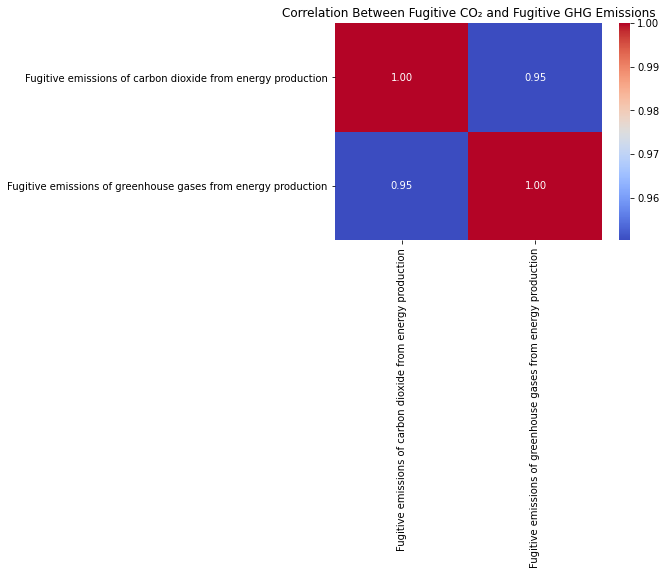

In [ ]:
# Compute correlation between Fugitive CO₂ Emissions and Fugitive GHG Emissions
fugitive_corr = merged_sector_emissions_filled[["Fugitive emissions of carbon dioxide from energy production", 
                                                  "Fugitive emissions of greenhouse gases from energy production"]].corr()



plt.figure(figsize=(6, 4))
sns.heatmap(fugitive_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Fugitive CO₂ and Fugitive GHG Emissions")
plt.show()


- There is high correlation between the CO2 and GHG gases, thus will substitute each missing values from each column with each other

In [ ]:
# Create a copy of the dataset before making changes
merged_sector_emissions_refilled = merged_sector_emissions_filled.copy()

# Check if both fugitive emissions columns exist before proceeding
fugitive_co2_col = "Fugitive emissions of carbon dioxide from energy production"
fugitive_ghg_col = "Fugitive emissions of greenhouse gases from energy production"

if fugitive_co2_col in merged_sector_emissions_refilled.columns and fugitive_ghg_col in merged_sector_emissions_refilled.columns:
    # Step 1: Fill missing Fugitive CO₂ using Fugitive GHG (if available)
    merged_sector_emissions_refilled[fugitive_co2_col] = merged_sector_emissions_refilled.apply(
        lambda row: row[fugitive_ghg_col] if pd.isna(row[fugitive_co2_col]) and not pd.isna(row[fugitive_ghg_col]) else row[fugitive_co2_col], axis=1
    )

    # Step 2: Fill missing Fugitive GHG using Fugitive CO₂ (if available)
    merged_sector_emissions_refilled[fugitive_ghg_col] = merged_sector_emissions_refilled.apply(
        lambda row: row[fugitive_co2_col] if pd.isna(row[fugitive_ghg_col]) and not pd.isna(row[fugitive_co2_col]) else row[fugitive_ghg_col], axis=1
    )

    # Step 3: Fill any remaining missing values with the median for that country
    for col in [fugitive_co2_col, fugitive_ghg_col]:
        merged_sector_emissions_refilled[col] = merged_sector_emissions_refilled.groupby("Entity")[col].transform(lambda x: x.fillna(x.median()))


c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [46]:
merged_sector_emissions_refilled.isna().sum()

Entity                                                             0
Code                                                             352
Year                                                               0
Carbon dioxide emissions from buildings                           64
Carbon dioxide emissions from industry                            64
Carbon dioxide emissions from land use change and forestry         0
Carbon dioxide emissions from other fuel combustion               64
Carbon dioxide emissions from transport                           64
Carbon dioxide emissions from manufacturing and construction      64
Fugitive emissions of carbon dioxide from energy production       64
Carbon dioxide emissions from electricity and heat                64
Carbon dioxide emissions from bunker fuels                        64
Greenhouse gas emissions from agriculture                          0
Greenhouse gas emissions from land use change and forestry         0
Greenhouse gas emissions from wast

# Per Capita CO2 emissions data

In [54]:
# Standardize column names for merging
per_capita_co2_df.rename(columns={"Year": "Year", "Entity": "Entity"}, inplace=True)

# Merge the per capita CO2 dataset with the cleaned sectoral emissions dataset
final_merged_df = pd.merge(merged_sector_emissions_refilled, per_capita_co2_df, on=["Entity", "Code","Year"], how="inner")

In [55]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6547 entries, 0 to 6546
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6547 non-null   object 
 1   Code                                                           6195 non-null   object 
 2   Year                                                           6547 non-null   int64  
 3   Carbon dioxide emissions from buildings                        6483 non-null   float64
 4   Carbon dioxide emissions from industry                         6483 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry     6547 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion            6483 non-null   float64
 7   Carbon dioxide emissions from transport                     

Dropping Missing Values and Columns

In [56]:
final_merged_df.isna().sum()

Entity                                                             0
Code                                                             352
Year                                                               0
Carbon dioxide emissions from buildings                           64
Carbon dioxide emissions from industry                            64
Carbon dioxide emissions from land use change and forestry         0
Carbon dioxide emissions from other fuel combustion               64
Carbon dioxide emissions from transport                           64
Carbon dioxide emissions from manufacturing and construction      64
Fugitive emissions of carbon dioxide from energy production       64
Carbon dioxide emissions from electricity and heat                64
Carbon dioxide emissions from bunker fuels                        64
Greenhouse gas emissions from agriculture                          0
Greenhouse gas emissions from land use change and forestry         0
Greenhouse gas emissions from wast

In [57]:
# Drop the "Code" column since it's redundant
cleaned_sector_emissions = final_merged_df.drop(columns=["Code"], errors="ignore")

In [58]:
# Drop records (rows) with missing values
cleaned_sector_emissions_final = cleaned_sector_emissions.dropna()

cleaned_sector_emissions_final.isna().sum()

Entity                                                           0
Year                                                             0
Carbon dioxide emissions from buildings                          0
Carbon dioxide emissions from industry                           0
Carbon dioxide emissions from land use change and forestry       0
Carbon dioxide emissions from other fuel combustion              0
Carbon dioxide emissions from transport                          0
Carbon dioxide emissions from manufacturing and construction     0
Fugitive emissions of carbon dioxide from energy production      0
Carbon dioxide emissions from electricity and heat               0
Carbon dioxide emissions from bunker fuels                       0
Greenhouse gas emissions from agriculture                        0
Greenhouse gas emissions from land use change and forestry       0
Greenhouse gas emissions from waste                              0
Greenhouse gas emissions from buildings                       

In [60]:
cleaned_sector_emissions_final.to_csv('../Data/Climate Change - datasets/clean_sector_emissions_final.csv')

In [61]:
cleaned_sector_emissions_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6355 entries, 0 to 6546
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6355 non-null   object 
 1   Year                                                           6355 non-null   int64  
 2   Carbon dioxide emissions from buildings                        6355 non-null   float64
 3   Carbon dioxide emissions from industry                         6355 non-null   float64
 4   Carbon dioxide emissions from land use change and forestry     6355 non-null   float64
 5   Carbon dioxide emissions from other fuel combustion            6355 non-null   float64
 6   Carbon dioxide emissions from transport                        6355 non-null   float64
 7   Carbon dioxide emissions from manufacturing and construction   63

# Merging Clean Sectoral Emissions Final & Temperature df final

In [66]:
# Merge the clean sectoral emissions dataset and temperature df final
sectoral_emission_temp_df = pd.merge(cleaned_sector_emissions_final, temperature_df_cleaned, on=["Entity", "Year"], how="left")

In [67]:
sectoral_emission_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6355 non-null   object 
 1   Year                                                           6355 non-null   int64  
 2   Carbon dioxide emissions from buildings                        6355 non-null   float64
 3   Carbon dioxide emissions from industry                         6355 non-null   float64
 4   Carbon dioxide emissions from land use change and forestry     6355 non-null   float64
 5   Carbon dioxide emissions from other fuel combustion            6355 non-null   float64
 6   Carbon dioxide emissions from transport                        6355 non-null   float64
 7   Carbon dioxide emissions from manufacturing and construction

-  You will loose 796 records from merging the data on inner join2, meaning we will be left with 5559 data points

### Merging Global Sea level dataset to the sectoral emission temp df